### 1.know the topic

#### The ultimate goal is to predict the accounts in test_accounts.csv file are human or bot,
#### in the train account, outcome = 1 means it is a bot account, outcome = 0 means it is a human account.
#### test_account_ground is the ground truth for the accounts in the test dataset, 1 means bot and 0 means human.

### 2.import the package

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import cross_val_predict, cross_validate
from sklearn.preprocessing import StandardScaler

### 3.Data uploading

In [2]:
train_accounts = pd.read_csv('data/train_accounts.csv')
test_accounts = pd.read_csv('data/test_accounts.csv')
train_bids = pd.read_csv('data/train_bids.csv')
test_bids = pd.read_csv('data/test_bids.csv')

In [3]:
train_accounts.head()

,bidder_id,payment_account,address,outcome
0,ea5948061b2059bcbd900d3ae7e86e428ae8g,cee2b2bb0c91cac4cf7c3d0a7f6f0dddt2lku,a3d2de7675556553a5f08e4c88d2c228n7xkp,0.0
1,6ed7b95dcea7b359248e9efce91cbb11lm7hf,b99d8ade6b54244634c184837e71a0c2zb0xg,3df736ae35c2d07da1f522484c0e68c2yi8x1,0.0
2,b1bc9ff2b98df742affda07c5977c7345dpm5,8d6440f57adbd2563c102f4226c0e014b2wzs,dbc5678b0387bff64d5df269b116806cx8uh8,0.0
3,56cfe8b0d574e1df3f823c2cf32226eff52uw,a3d2de7675556553a5f08e4c88d2c2283qq7l,bc94c8f4b1df26180566a8b5612d868e7gpwg,0.0
4,3d94b376bae8dd60eea48ded36134a3962glw,a3d2de7675556553a5f08e4c88d2c228vswfg,a79c0f5caf9727c13b5f1b9df6fc072eg5j2y,0.0


In [4]:
train_bids.head()

,bid_id,bidder_id,auction,merchandise,device,time,country,ip,url
0,4701043,ae45f9b94d86f931c84c94f3975e3d7bkv2r0,z6se8,office equipment,phone4,9.642930e+15,vn,213.234.5.30,vasstdc27m7nks3
1,937200,ea5948061b2059bcbd900d3ae7e86e428ae8g,g4cv3,mobile,phone53,9.764300e+15,ae,205.207.249.115,uie67hmbvt2wil7
2,4800124,8c33cf751b05ca6a9d886a379a84a2ees9jlu,k3pcw,mobile,phone1681,9.643640e+15,us,44.77.106.238,vasstdc27m7nks3
3,5315682,ae45f9b94d86f931c84c94f3975e3d7bkv2r0,i506w,office equipment,phone4,9.695870e+15,ke,24.111.180.137,vasstdc27m7nks3
4,1574124,d2704c8bb6ebbf13e08f37131382b126wy4yc,k0h6a,mobile,phone4,9.768430e+15,in,57.163.90.101,vasstdc27m7nks3


In [5]:
test_bids.head()

,bid_id,bidder_id,auction,merchandise,device,time,country,ip,url
0,1944758,5f529b5ee68b60482c5d0c56ee91f3c2cjrmx,lg9bk,office equipment,phone99,9.770210e+15,th,59.246.142.163,dzd3lg4xy0irlvg
1,1925420,c670e7fb466b09000f1053d2761752268bkfm,aly3t,office equipment,phone143,9.770020e+15,au,165.208.198.120,vasstdc27m7nks3
2,1365920,20ebb9de648c6df989f04d07cf273c7b3yu8c,jefix,mobile,phone224,9.767290e+15,us,91.117.186.2,vasstdc27m7nks3
3,1924978,c670e7fb466b09000f1053d2761752268bkfm,k169w,office equipment,phone143,9.770010e+15,au,165.208.198.120,vasstdc27m7nks3
4,1304018,20ebb9de648c6df989f04d07cf273c7b3yu8c,71nze,mobile,phone224,9.766890e+15,us,91.117.186.2,vasstdc27m7nks3


### 4.Data description

In [6]:
train_bids.shape

(562753, 9)

In [7]:
train_bids.describe()

,bid_id,time
count,5.627530e+05,5.627530e+05
mean,3.380500e+06,9.706990e+15
std,2.245705e+06,5.459125e+13
min,2.000000e+01,9.631920e+15
25%,1.357605e+06,9.641880e+15
50%,3.147260e+06,9.704560e+15
75%,5.274860e+06,9.764060e+15
max,7.656319e+06,9.772890e+15


In [8]:
train_bids[['country']].describe()

,country
count,562753
unique,178
top,in
freq,95037


### 5.Data cleaning

In [9]:
train_bids.isnull().sum()
#no missing data

bid_id         0
bidder_id      0
auction        0
merchandise    0
device         0
time           0
country        0
ip             0
url            0
dtype: int64

### 6.Feature engineering

#### 6.1 Quantitative: feature counts per bid(account)

In [10]:
train_bids.groupby(['bidder_id'])['ip'].nunique().head()

bidder_id
01255c2c7c5578c186873422fc00fd7afwk8k     55
01349288df20199905e719f0ff7ee771nwryj     49
01a39439e7afbdcfe385eedbddb23d76zgdrg    216
01c5692d487454cdbe731df330bef608f48zz     44
01eb9dcbd0b3e79d94020d13d83a993ec9d2a      3
Name: ip, dtype: int64

In [11]:
train_bids.head()

,bid_id,bidder_id,auction,merchandise,device,time,country,ip,url
0,4701043,ae45f9b94d86f931c84c94f3975e3d7bkv2r0,z6se8,office equipment,phone4,9.642930e+15,vn,213.234.5.30,vasstdc27m7nks3
1,937200,ea5948061b2059bcbd900d3ae7e86e428ae8g,g4cv3,mobile,phone53,9.764300e+15,ae,205.207.249.115,uie67hmbvt2wil7
2,4800124,8c33cf751b05ca6a9d886a379a84a2ees9jlu,k3pcw,mobile,phone1681,9.643640e+15,us,44.77.106.238,vasstdc27m7nks3
3,5315682,ae45f9b94d86f931c84c94f3975e3d7bkv2r0,i506w,office equipment,phone4,9.695870e+15,ke,24.111.180.137,vasstdc27m7nks3
4,1574124,d2704c8bb6ebbf13e08f37131382b126wy4yc,k0h6a,mobile,phone4,9.768430e+15,in,57.163.90.101,vasstdc27m7nks3


In [12]:
#define a function, to count number of each feature per bidder_id, then store in a dictionary
def statByFeature(data, features):
    bidders_statistic = dict()
    bidders = data['bidder_id'].unique()
    for feature in features:        
        seg = data[['bidder_id',feature]]
        seg_res= seg.groupby('bidder_id')[feature].nunique().reset_index(name=feature)
        bidders_statistic[feature] = seg_res
    res = bidders_statistic[features[0]] 
    for feature in  features[1:]:
        res = pd.merge(res, bidders_statistic[feature], on='bidder_id')
    return res

In [13]:
features=['device','ip','url','merchandise','auction','country']
quant_feature_train = statByFeature(train_bids, features)
quant_feature_test = statByFeature(test_bids, features)

In [14]:
quant_feature_train.head()
#each row mean:each bidder_id uses the number of device, ip, url in how many country make how many auctions on how many merchandise
#so, if too many country and ip and device, it's highly possible to be a bot

,bidder_id,device,ip,url,merchandise,auction,country
0,01255c2c7c5578c186873422fc00fd7afwk8k,34,55,29,1,13,6
1,01349288df20199905e719f0ff7ee771nwryj,28,49,23,1,31,4
2,01a39439e7afbdcfe385eedbddb23d76zgdrg,94,216,49,1,131,26
3,01c5692d487454cdbe731df330bef608f48zz,41,44,28,1,19,5
4,01eb9dcbd0b3e79d94020d13d83a993ec9d2a,3,3,2,1,2,2


In [15]:
### since the 'merchandise' are all 1, drop it
features=['device','ip','url','auction','country']
quant_feature_train = statByFeature(train_bids, features)
quant_feature_test = statByFeature(test_bids, features)

In [16]:
quant_feature_train.head()

,bidder_id,device,ip,url,auction,country
0,01255c2c7c5578c186873422fc00fd7afwk8k,34,55,29,13,6
1,01349288df20199905e719f0ff7ee771nwryj,28,49,23,31,4
2,01a39439e7afbdcfe385eedbddb23d76zgdrg,94,216,49,131,26
3,01c5692d487454cdbe731df330bef608f48zz,41,44,28,19,5
4,01eb9dcbd0b3e79d94020d13d83a993ec9d2a,3,3,2,2,2


In [17]:
#from the table, the bidder is highly possible a bot, ex.2,it's less possible for a human 
#to bid using 94 device, 216 ip and 131 auuction in 26 countries
#then, further to look insight each feature

#### Qualititive: feature scores per objects (feature)

In [18]:
df_train = pd.merge(train_bids, train_accounts[['bidder_id','outcome']],on='bidder_id')

In [19]:
df_train.head()

,bid_id,bidder_id,auction,merchandise,device,time,country,ip,url,outcome
0,4701043,ae45f9b94d86f931c84c94f3975e3d7bkv2r0,z6se8,office equipment,phone4,9.642930e+15,vn,213.234.5.30,vasstdc27m7nks3,0.0
1,5315682,ae45f9b94d86f931c84c94f3975e3d7bkv2r0,i506w,office equipment,phone4,9.695870e+15,ke,24.111.180.137,vasstdc27m7nks3,0.0
2,5348147,ae45f9b94d86f931c84c94f3975e3d7bkv2r0,aornh,office equipment,phone508,9.695970e+15,tw,94.77.24.125,qnvyrbe2q64485d,0.0
3,6956888,ae45f9b94d86f931c84c94f3975e3d7bkv2r0,i506w,office equipment,phone35,9.705080e+15,ke,150.72.18.78,0i79k658qw670j2,0.0
4,5539232,ae45f9b94d86f931c84c94f3975e3d7bkv2r0,vceur,office equipment,phone229,9.696820e+15,fr,246.147.189.47,8j97azbkxfm2axh,0.0


In [20]:
#count number of outcomes  which is 1 in each country
df_train.groupby(['country'])['outcome'].sum().sort_values(ascending=False).head()

country
in    30127.0
th    13535.0
id     9507.0
us     8976.0
ru     8784.0
Name: outcome, dtype: float64

In [21]:
df_train.merchandise.value_counts()
#count number of each merchandise

mobile              220307
sporting goods      134086
jewelry             107241
office equipment     60982
home goods           24247
computers            13963
books and music       1921
furniture                6
Name: merchandise, dtype: int64

In [22]:
test_bids.merchandise.value_counts()
#test dataset has clothing in merchandise, but training dataset doesn't have it

sporting goods      33259
jewelry             16603
mobile              12753
office equipment     4302
home goods           2440
computers            2083
clothing              272
books and music        82
Name: merchandise, dtype: int64

In [23]:
#define a function to find the feature risk(number of 1 / number of outcomes in each objects of each feature)
def riskByFeature(data, ref, features):
    res = data
    for feature in features:
        event = ref.groupby(feature)['outcome'].sum() #count number of outcomes=1 for each feature
        count = ref.groupby(feature)['outcome'].count() #count number of outcomes happened for each feature
        temp = pd.DataFrame(event/count).reset_index() #calculate the risk  for each feature,create 2 cols
        #Data Frame.reset_index(): sets a list of integer ranging from 0 to length of data as index.
        temp.columns = [feature,str(feature+'_risk')] #define the name of two columns in temp
        #since testing dataset has clothing in merchandise, fill the mean to clothing in training data
        if feature == 'merchandise':
            infer = np.mean(temp[str(feature+'_risk')]) #return the mean for the merchandise_risk
            temp = temp.append({'merchandise':'clothing', 'merchandise_risk':infer}, ignore_index=True)
        res = pd.merge(res, temp, on=feature)
    return res

In [24]:
features = ['auction','device','merchandise','country','ip','url']
risk_summary = riskByFeature(df_train, df_train, features)
risk_summary.head()
#the bidder_id is repeated

,bid_id,bidder_id,auction,merchandise,device,time,country,ip,url,outcome,auction_risk,device_risk,merchandise_risk,country_risk,ip_risk,url_risk
0,4701043,ae45f9b94d86f931c84c94f3975e3d7bkv2r0,z6se8,office equipment,phone4,9.642930e+15,vn,213.234.5.30,vasstdc27m7nks3,0.0,0.061837,0.07569,0.072759,0.130938,0.244898,0.287907
1,4017870,ae45f9b94d86f931c84c94f3975e3d7bkv2r0,z6se8,office equipment,phone4,9.640270e+15,vn,213.234.5.30,vasstdc27m7nks3,0.0,0.061837,0.07569,0.072759,0.130938,0.244898,0.287907
2,3193115,ae45f9b94d86f931c84c94f3975e3d7bkv2r0,z6se8,office equipment,phone4,9.636080e+15,vn,213.234.5.30,vasstdc27m7nks3,0.0,0.061837,0.07569,0.072759,0.130938,0.244898,0.287907
3,3772904,ae45f9b94d86f931c84c94f3975e3d7bkv2r0,z6se8,office equipment,phone4,9.638810e+15,vn,213.234.5.30,vasstdc27m7nks3,0.0,0.061837,0.07569,0.072759,0.130938,0.244898,0.287907
4,3193277,ae45f9b94d86f931c84c94f3975e3d7bkv2r0,z6se8,office equipment,phone4,9.636090e+15,vn,213.234.5.30,vasstdc27m7nks3,0.0,0.061837,0.07569,0.072759,0.130938,0.244898,0.287907


In [ ]:
risk_summary.to_csv('risk_summary1.csv',index=None)

In [25]:
derive_features = ['auction_risk','device_risk','merchandise_risk','country_risk','ip_risk','url_risk']
quality_feature_train = pd.DataFrame(risk_summary.groupby('bidder_id')[derive_features].mean()).\
reset_index()

In [26]:
quality_feature_train.head()

,bidder_id,auction_risk,device_risk,merchandise_risk,country_risk,ip_risk,url_risk
0,01255c2c7c5578c186873422fc00fd7afwk8k,0.177427,0.208080,0.104167,0.274096,0.049307,0.128451
1,01349288df20199905e719f0ff7ee771nwryj,0.334319,0.177877,0.349435,0.302686,0.047691,0.123389
2,01a39439e7afbdcfe385eedbddb23d76zgdrg,0.293888,0.177490,0.349435,0.278102,0.068128,0.160563
3,01c5692d487454cdbe731df330bef608f48zz,0.016842,0.166098,0.785528,0.034493,0.049764,0.161509
4,01eb9dcbd0b3e79d94020d13d83a993ec9d2a,0.134906,0.155707,0.349435,0.277969,0.000000,0.191938


In [27]:
#do the same thing on test dataset
df_test = pd.merge(test_bids, test_accounts[['bidder_id']],on='bidder_id')
risk_summary = riskByFeature(df_test, df_train, features)#df_test has no outcome,so using df_train
quality_feature_test = pd.DataFrame(risk_summary.groupby('bidder_id')[derive_features].mean()).reset_index()

### 6.Exploratory data analysis

#### Histogram--from sample space

E:\downloads\Anaconada\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
E:\downloads\Anaconada\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
E:\downloads\Anaconada\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
E:\downloads\Anaconada\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
E:\downloads\Anaconada\lib\site-packages\matplotlib\axes\_axes.py:6462: User

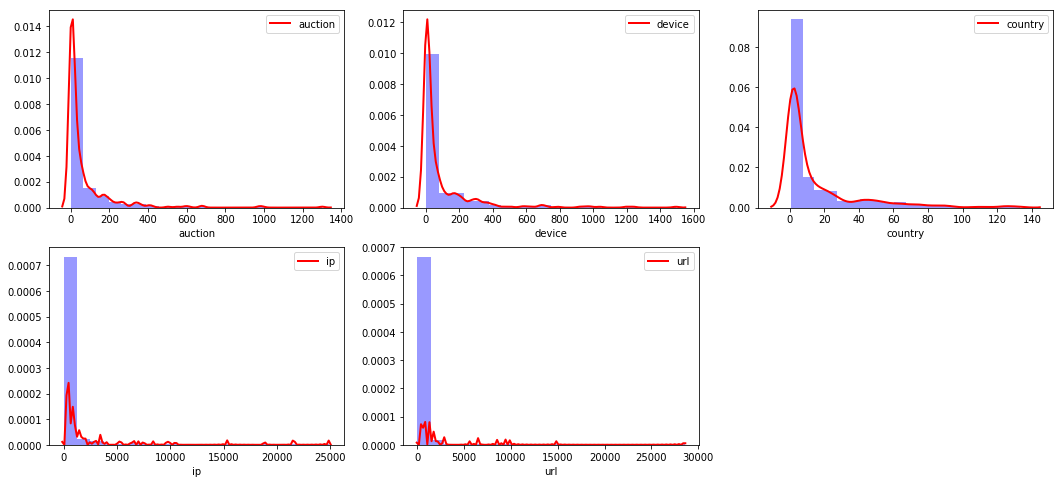

In [28]:
feature = ['auction','device','country','ip','url']
index = 0
plt.figure(figsize=(18,8))
data = quant_feature_train
for fea in feature:
    index += 1
    plt.subplot(2,3, index)
    plt.xlabel(fea)
    sns.distplot(data[fea],kde=True,bins=20, color='b', kde_kws={"color": "r", "lw": 2, "label": fea})

In [29]:
## there's some abnormal large data from the histgram plots

E:\downloads\Anaconada\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
E:\downloads\Anaconada\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
E:\downloads\Anaconada\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
E:\downloads\Anaconada\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
E:\downloads\Anaconada\lib\site-packages\matplotlib\axes\_axes.py:6462: User

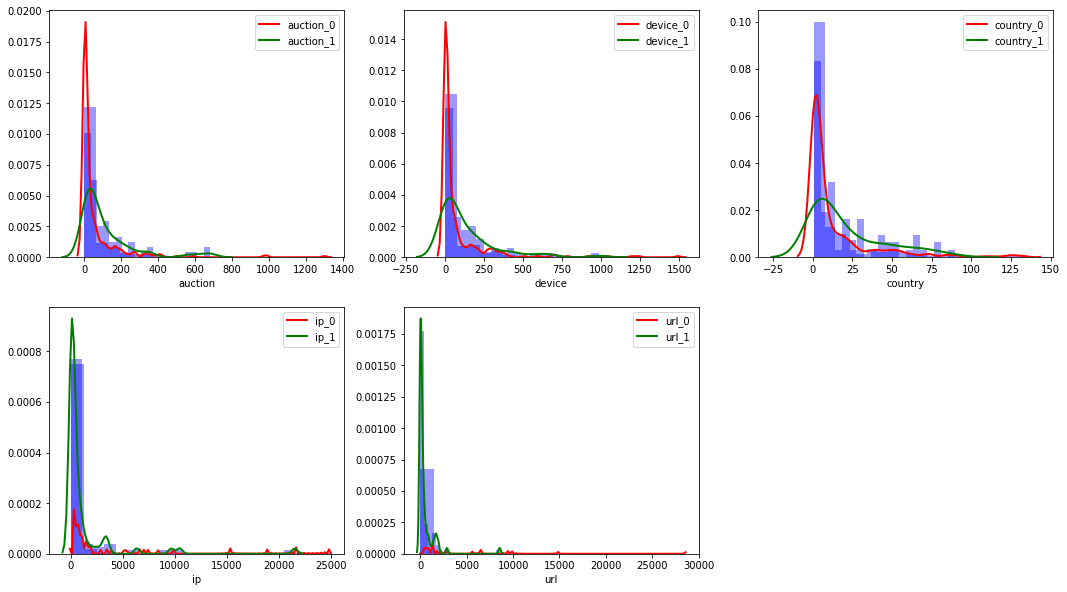

In [30]:
#plot histgram of 0 (human) and 1 (bot) for each feature
feature = ['auction','device','country','ip','url']
index = 0
plt.figure(figsize=(18,10))
data = pd.merge(quant_feature_train, train_accounts, on='bidder_id')
data_0 = data[data.outcome==0].drop(['payment_account', 'address'],axis=1)
data_1 = data[data.outcome==1].drop(['payment_account', 'address'],axis=1)
for fea in feature:
    index += 1
    plt.subplot(2,3, index)
    plt.xlabel(fea)
    sns.distplot(data_0[fea],kde=True,bins=20, color='b', kde_kws={"color": "r", "lw": 2, "label": fea+'_0'})
    sns.distplot(data_1[fea],kde=True,bins=20, color='b', kde_kws={"color": "g", "lw": 2, "label": fea+'_1'})

In [31]:
#from the barplot, there're some differences between bot and human within the features 

#### Barplot--from feature space

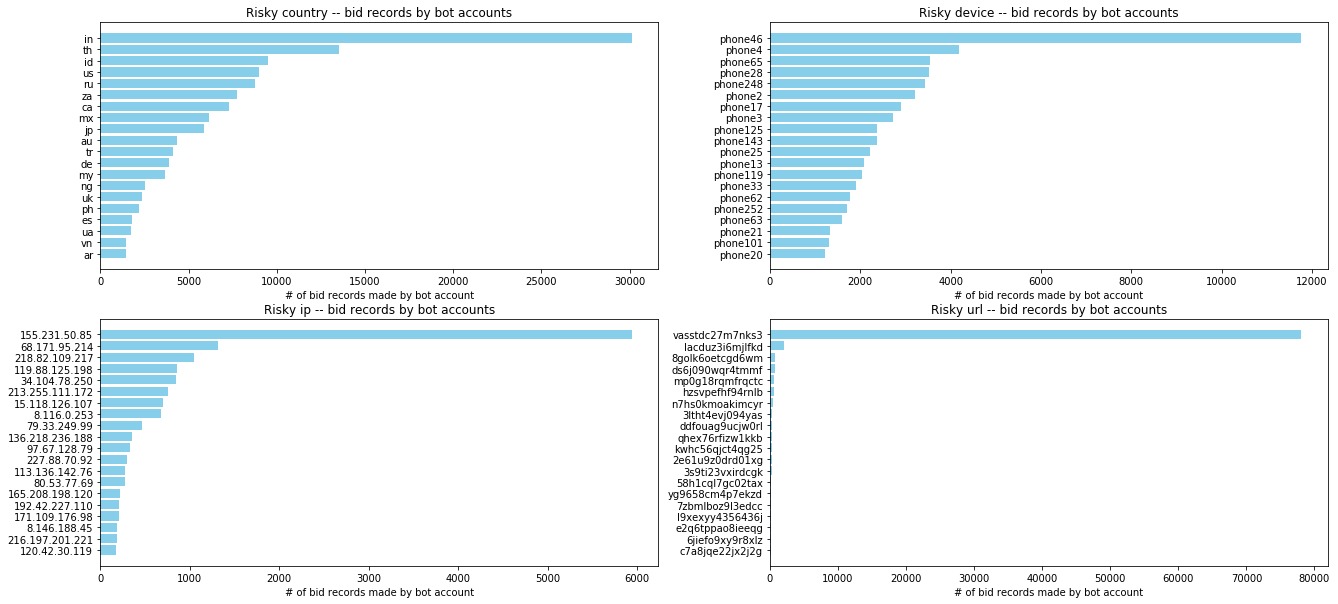

In [32]:
index = 0
plt.figure(figsize=(22,10))
features = ['country','device','ip','url']
for feature in features:
    index += 1
    plt.subplot(2,2, index)
    data = df_train.groupby([feature])['outcome'].sum().sort_values(ascending=False)
    #return number of bot for each feature,order by descending
    data = data.reset_index()[0:20]#show the first 20th type of each feature for each bot
    importances = data['outcome']
    features_name = data[feature]
    indices = np.argsort(importances)# sort indice
    plt.title('Risky '+ str(feature) + ' -- bid records by bot accounts')
    plt.barh(range(len(indices)), importances[indices], color='skyblue', align='center')
    plt.yticks(range(len(indices)), features_name[indices])
    plt.xlabel('# of bid records made by bot account')
plt.show()

In [33]:
#from the barplot, we can get the features which are created by bot

### 7. Model building

##### Logistic regression--define X and Y

In [34]:
combined_feature = pd.merge(quant_feature_train, quality_feature_train, on='bidder_id')

In [35]:
combined_feature.head()

,bidder_id,device,ip,url,auction,country,auction_risk,device_risk,merchandise_risk,country_risk,ip_risk,url_risk
0,01255c2c7c5578c186873422fc00fd7afwk8k,34,55,29,13,6,0.177427,0.208080,0.104167,0.274096,0.049307,0.128451
1,01349288df20199905e719f0ff7ee771nwryj,28,49,23,31,4,0.334319,0.177877,0.349435,0.302686,0.047691,0.123389
2,01a39439e7afbdcfe385eedbddb23d76zgdrg,94,216,49,131,26,0.293888,0.177490,0.349435,0.278102,0.068128,0.160563
3,01c5692d487454cdbe731df330bef608f48zz,41,44,28,19,5,0.016842,0.166098,0.785528,0.034493,0.049764,0.161509
4,01eb9dcbd0b3e79d94020d13d83a993ec9d2a,3,3,2,2,2,0.134906,0.155707,0.349435,0.277969,0.000000,0.191938


In [36]:
dfLR_train = pd.merge(combined_feature, train_accounts, on='bidder_id')

In [37]:
dfLR_train.head()

,bidder_id,device,ip,url,auction,country,auction_risk,device_risk,merchandise_risk,country_risk,ip_risk,url_risk,payment_account,address,outcome
0,01255c2c7c5578c186873422fc00fd7afwk8k,34,55,29,13,6,0.177427,0.208080,0.104167,0.274096,0.049307,0.128451,a3d2de7675556553a5f08e4c88d2c228ub9v1,f61893a13012022c0d7f875d2030805dagxm1,0.0
1,01349288df20199905e719f0ff7ee771nwryj,28,49,23,31,4,0.334319,0.177877,0.349435,0.302686,0.047691,0.123389,a3d2de7675556553a5f08e4c88d2c228d99fp,f1cbc047730182fce18540c4915fb609uzqae,0.0
2,01a39439e7afbdcfe385eedbddb23d76zgdrg,94,216,49,131,26,0.293888,0.177490,0.349435,0.278102,0.068128,0.160563,f1620859bb80f8fe791bf5c3cddd0b54ezi86,c94cf5c3c5205afe0ef14ce669e015650as54,0.0
3,01c5692d487454cdbe731df330bef608f48zz,41,44,28,19,5,0.016842,0.166098,0.785528,0.034493,0.049764,0.161509,240f40b4e3ce8f0d3bf8b7abdcf7e9d955tqa,58048808b920ee7ff05d34d2f817dae1vt41w,0.0
4,01eb9dcbd0b3e79d94020d13d83a993ec9d2a,3,3,2,2,2,0.134906,0.155707,0.349435,0.277969,0.000000,0.191938,a3d2de7675556553a5f08e4c88d2c228x4b9d,c76d416cc847dfcbc9755f743e15dc5a4ms5q,0.0


In [38]:
dfLR_train.drop(['payment_account','address'],1).to_csv('final_train.csv',index=None)

In [39]:
XLR_train = dfLR_train.drop(['bidder_id', \
                             'payment_account', \
                             'address', 'outcome'], 1)
yLR_train = dfLR_train['outcome']

In [40]:
combined_feature = pd.merge(quant_feature_test, quality_feature_test, on='bidder_id')
dfLR_test = pd.merge(combined_feature, test_accounts, on='bidder_id')
XLR_test = dfLR_test.drop(['bidder_id','payment_account', 'address'], 1)

#### Naive Bayes

In [56]:
def riskScoreBayes(data, ref, features):
    risk = dict()
    for feature in features:
        #conditional probability P(xi|y=1)= #of (xi|y=1)/#of y=1:
        risk_con = pd.DataFrame(ref.groupby([feature])['outcome'].sum()\
                                /np.sum(ref['outcome'])).reset_index() 
        risk_con.columns = [feature, str(feature+'_risk')]
        #columns:feature, feature_risk
        
        #(#of xi/#of y=0):
        p_xi_given_y_total = pd.DataFrame(ref.groupby([feature])['outcome'].count()\
                     /(len(ref)-np.sum(ref['outcome']))).reset_index() 
        #columns:feature, outcome
        
        #conditional prob. P(xi|y=1)= #of (xi|y=1)/#of y=0 :
        p_xi_given_y_bad = pd.DataFrame(ref.groupby([feature])['outcome'].sum()\
                     /(len(ref)-np.sum(ref['outcome']))).reset_index()
        #columns:feature, outcome
        
        normal_con = pd.merge(p_xi_given_y_total, p_xi_given_y_bad, on=feature)
        #print(normal_con.columns)
        #merge(suffixes):default (‘_x’, ‘_y’),so the columns:feature, outcome_x, outcome_y
        normal_con[str(feature+'_normal')] = normal_con['outcome_x']-normal_con['outcome_y']
        #columns:feature, outcome_x, outcome_y, feature_normal
        #feature_normal= (#of xi|y=0)/ #of y=0
        
        feature_risk = pd.merge(risk_con,normal_con,on=feature)
        #cols:feature, feature_risk, outcome_x, outcome_y, feature_normal
        feature_risk = feature_risk[[feature, str(feature+'_risk'),str(feature+'_normal')]]
        
        #deal with merchandise feature:
        if feature == 'merchandise':
            infer_risk = np.mean(feature_risk[str(feature+'_risk')])
            infer_normal = np.mean(feature_risk[str(feature+'_normal')])
            feature_risk = feature_risk.append({'merchandise':'clothing', \
                                'merchandise_risk':infer_risk, \
                                'merchandise_normal':infer_normal}, ignore_index=True)
        
        #put all the feature_risk(3 columns) in the risk dictionary
        risk[feature] = feature_risk
        #print(risk)
    res = data
    for feature in features:
        res = pd.merge(res, risk[feature], on=feature)
        #columns:feature, feature_risk, feature_normal
    return res
'''
summary: 
feature_risk=(#of xi=*|y=1)/#of y=1 means:probability that feature of xi is * given bidder is bot 
feature_normal=(#of xi=*|y=0)/#of y=0 means:probability that feature of xi is * given bidder is human 
'''

In [57]:
features = ['auction','device','country','merchandise','ip','url']
# the number of features n=6, response y k=2

In [58]:
dfNB_train = riskScoreBayes(df_train, df_train, features)
dfNB_test = riskScoreBayes(df_test, df_train, features)

In [59]:
dfNB_train.head()

,bid_id,bidder_id,auction,merchandise,device,time,country,ip,url,outcome,...,device_risk,device_normal,country_risk,country_normal,merchandise_risk,merchandise_normal,ip_risk,ip_normal,url_risk,url_normal
0,4701043,ae45f9b94d86f931c84c94f3975e3d7bkv2r0,z6se8,office equipment,phone4,9.642930e+15,vn,213.234.5.30,vasstdc27m7nks3,0.0,...,0.027861,0.123962,0.009702,0.023461,0.029525,0.137088,0.00008,0.00009,0.519524,0.468162
1,4017870,ae45f9b94d86f931c84c94f3975e3d7bkv2r0,z6se8,office equipment,phone4,9.640270e+15,vn,213.234.5.30,vasstdc27m7nks3,0.0,...,0.027861,0.123962,0.009702,0.023461,0.029525,0.137088,0.00008,0.00009,0.519524,0.468162
2,3193115,ae45f9b94d86f931c84c94f3975e3d7bkv2r0,z6se8,office equipment,phone4,9.636080e+15,vn,213.234.5.30,vasstdc27m7nks3,0.0,...,0.027861,0.123962,0.009702,0.023461,0.029525,0.137088,0.00008,0.00009,0.519524,0.468162
3,3772904,ae45f9b94d86f931c84c94f3975e3d7bkv2r0,z6se8,office equipment,phone4,9.638810e+15,vn,213.234.5.30,vasstdc27m7nks3,0.0,...,0.027861,0.123962,0.009702,0.023461,0.029525,0.137088,0.00008,0.00009,0.519524,0.468162
4,3193277,ae45f9b94d86f931c84c94f3975e3d7bkv2r0,z6se8,office equipment,phone4,9.636090e+15,vn,213.234.5.30,vasstdc27m7nks3,0.0,...,0.027861,0.123962,0.009702,0.023461,0.029525,0.137088,0.00008,0.00009,0.519524,0.468162


In [60]:
prior_1 = np.sum(dfNB_train.outcome)/len(dfNB_train) #P(y=1)
prior_0 = 1-prior_1 #P(y=0)

In [61]:
print ('[prior_1, prior_0]: '+str([prior_1, prior_0]))

[prior_1, prior_0]: [0.2670443338374029, 0.7329556661625971]


In [62]:
dfNB_test.head()

,bid_id,bidder_id,auction,merchandise,device,time,country,ip,url,auction_risk,...,device_risk,device_normal,country_risk,country_normal,merchandise_risk,merchandise_normal,ip_risk,ip_normal,url_risk,url_normal
0,1944758,5f529b5ee68b60482c5d0c56ee91f3c2cjrmx,lg9bk,office equipment,phone99,9.770210e+15,th,59.246.142.163,dzd3lg4xy0irlvg,0.000080,...,0.002642,0.006105,0.090065,0.026584,0.029525,0.137088,0.000033,0.0,0.00004,0.0
1,1944802,5f529b5ee68b60482c5d0c56ee91f3c2cjrmx,cxozc,office equipment,phone99,9.770210e+15,th,59.246.142.163,dzd3lg4xy0irlvg,0.000100,...,0.002642,0.006105,0.090065,0.026584,0.029525,0.137088,0.000033,0.0,0.00004,0.0
2,1944765,5f529b5ee68b60482c5d0c56ee91f3c2cjrmx,ijru6,office equipment,phone99,9.770210e+15,th,59.246.142.163,dzd3lg4xy0irlvg,0.000060,...,0.002642,0.006105,0.090065,0.026584,0.029525,0.137088,0.000033,0.0,0.00004,0.0
3,1944748,5f529b5ee68b60482c5d0c56ee91f3c2cjrmx,psscd,office equipment,phone99,9.770210e+15,th,59.246.142.163,dzd3lg4xy0irlvg,0.000053,...,0.002642,0.006105,0.090065,0.026584,0.029525,0.137088,0.000033,0.0,0.00004,0.0
4,1944778,5f529b5ee68b60482c5d0c56ee91f3c2cjrmx,fbp7d,office equipment,phone99,9.770210e+15,th,59.246.142.163,dzd3lg4xy0irlvg,0.000053,...,0.002642,0.006105,0.090065,0.026584,0.029525,0.137088,0.000033,0.0,0.00004,0.0


In [63]:
#split X and Y
XNB_train = dfNB_train[['auction_risk','auction_normal',\
                        'device_risk', 'device_normal',\
                        'country_risk', 'country_normal',\
                        'merchandise_risk','merchandise_normal',\
                        'ip_risk', 'ip_normal',\
                        'url_risk', 'url_normal']]
yNB_train_bid_level = dfNB_train[['outcome']]

In [64]:
XNB_train.head()

,auction_risk,auction_normal,device_risk,device_normal,country_risk,country_normal,merchandise_risk,merchandise_normal,ip_risk,ip_normal,url_risk,url_normal
0,0.000466,0.002575,0.027861,0.123962,0.009702,0.023461,0.029525,0.137088,0.00008,0.00009,0.519524,0.468162
1,0.000466,0.002575,0.027861,0.123962,0.009702,0.023461,0.029525,0.137088,0.00008,0.00009,0.519524,0.468162
2,0.000466,0.002575,0.027861,0.123962,0.009702,0.023461,0.029525,0.137088,0.00008,0.00009,0.519524,0.468162
3,0.000466,0.002575,0.027861,0.123962,0.009702,0.023461,0.029525,0.137088,0.00008,0.00009,0.519524,0.468162
4,0.000466,0.002575,0.027861,0.123962,0.009702,0.023461,0.029525,0.137088,0.00008,0.00009,0.519524,0.468162


In [65]:
XNB_test = dfNB_test[['auction_risk','auction_normal',\
                     'device_risk', 'device_normal',\
                     'country_risk', 'country_normal',\
                      'merchandise_risk','merchandise_normal',\
                     'ip_risk', 'ip_normal',\
                     'url_risk', 'url_normal']]

In [66]:
XNB_test.head()

,auction_risk,auction_normal,device_risk,device_normal,country_risk,country_normal,merchandise_risk,merchandise_normal,ip_risk,ip_normal,url_risk,url_normal
0,0.000080,0.000000,0.002642,0.006105,0.090065,0.026584,0.029525,0.137088,0.000033,0.0,0.00004,0.0
1,0.000100,0.000264,0.002642,0.006105,0.090065,0.026584,0.029525,0.137088,0.000033,0.0,0.00004,0.0
2,0.000060,0.000000,0.002642,0.006105,0.090065,0.026584,0.029525,0.137088,0.000033,0.0,0.00004,0.0
3,0.000053,0.000000,0.002642,0.006105,0.090065,0.026584,0.029525,0.137088,0.000033,0.0,0.00004,0.0
4,0.000053,0.000000,0.002642,0.006105,0.090065,0.026584,0.029525,0.137088,0.000033,0.0,0.00004,0.0


### 8.Prediction
#### Logistic regression

In [67]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(solver = 'lbfgs')
LR.fit(XLR_train, yLR_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='lbfgs', tol=0.0001,
          verbose=0, warm_start=False)

In [68]:
yLR_train_pred = LR.predict_proba(XLR_train)
yLR_test_pred = LR.predict_proba(XLR_test)

In [72]:
#check the first estimated prob., the two should sum to 1,[P(y=0), P(y=1)]
yLR_train_pred[0]

array([0.89742395, 0.10257605])

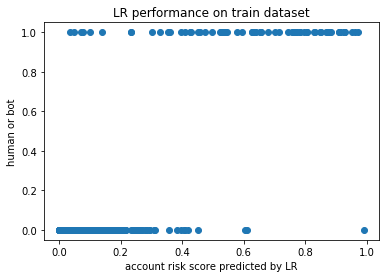

In [73]:
#visualization, x is estimated P(y=1) from training data, y is 0 or 1 from training data
plt.plot(yLR_train_pred[:,1], yLR_train, 'o')
plt.xlabel('account risk score predicted by LR')
plt.ylabel('human or bot')
plt.title('LR performance on train dataset')
plt.show()

In [74]:
#put the estimated P(y=1) from the test data into the test dataset
dfLR_test['p_risk'] = yLR_test_pred[:,1]

In [75]:
dfLR_test.head()

,bidder_id,device,ip,url,auction,country,auction_risk,device_risk,merchandise_risk,country_risk,ip_risk,url_risk,payment_account,address,p_risk
0,001068c415025a009fee375a12cff4fcnht8y,1,1,1,1,1,0.088710,0.017544,0.104167,0.060694,0.060000,0.287907,a3d2de7675556553a5f08e4c88d2c228iiasc,a3d2de7675556553a5f08e4c88d2c2282aj35,0.178817
1,022ac3a7ce986049d9a4bede83ccf9ddctvg6,17,2,1,40,3,0.159152,0.486288,0.240360,0.281261,0.942081,0.287907,57aec2c76d2db80cf61c2543d15ef9f82tplj,c57c64adcc43ce50d99f184d87981d87yz2di,0.676952
2,03244a553a252dcc3a3037f0371c8d33fmpd1,1,1,1,1,1,0.000000,0.159439,0.104167,0.317003,1.000000,0.287907,a3d2de7675556553a5f08e4c88d2c22886sbt,1df0b2cb82cd98e90972acc8e8a752detwki0,0.622321
3,067ff22ebf0d33fe0deedc816d75973865jo7,7,17,1,22,5,0.121279,0.111982,0.303857,0.255374,0.501711,0.287907,a3d2de7675556553a5f08e4c88d2c22848lqa,022b06519985716abd9fc8ce83540d58wsgo1,0.336489
4,09d71d3e6a6871a7598dc2764c5bb4ffkz6mc,4,5,1,9,5,0.382435,0.284171,0.303857,0.364492,0.351144,0.287907,a3d2de7675556553a5f08e4c88d2c228aiumg,a3d2de7675556553a5f08e4c88d2c228y7jgq,0.260815


In [76]:
#order the results according to the bidder_id of test_account
yLR_test_pred = np.array(pd.merge(test_accounts, dfLR_test, on='bidder_id')['p_risk'])

#### Naive bayes_prediction

In [77]:
def bayesPred(data, features, prior):
    p_normal = pd.Series(prior[0]*np.ones(len(data)))
    #pd.Series():One-dimensional ndarray with axis labels
    #np.ones():Return a new array of given shape and type, filled with ones.
    p_risk = pd.Series(prior[1]*np.ones(len(data)))
    for feature in features:
        p_normal=p_normal*data[str(feature)+'_normal'] #P(y=0)*P(xi=*|y=0)(multiplication)
        p_risk=p_risk*data[str(feature)+'_risk'] #P(y=0)*P(xi=*|y=0)(multiplication)
    return p_normal, p_risk
'''
According Naive Bayes:
p_normal means: probability of y=0 given each sample
p_risk means: probability of y=1 given each sample
'''

In [78]:
features = ['auction','device','merchandise','country','ip','url']
prior = [prior_0, prior_1]

In [ ]:
## dfNB_train = dfNB_train.drop(['p_normal','p_risk'],axis=1)

In [79]:
#Naive Bayes prediction
p_normal, p_risk = bayesPred(XNB_train, features, prior)

In [85]:
#set p=0.5 as the divided line between 0 and 1, get the proportion of P(y=1|X)/(P(y=1|X)+P(y=0|X))
dfNB_train['p_normal'] = p_normal/(p_normal+p_risk)
dfNB_train['p_risk'] = p_risk/(p_normal+p_risk)
dfNB_train_bayes = dfNB_train[['bid_id','bidder_id','p_normal','p_risk']]

In [86]:
df_train.head()

,bid_id,bidder_id,auction,merchandise,device,time,country,ip,url,outcome
0,4701043,ae45f9b94d86f931c84c94f3975e3d7bkv2r0,z6se8,office equipment,phone4,9.642930e+15,vn,213.234.5.30,vasstdc27m7nks3,0.0
1,5315682,ae45f9b94d86f931c84c94f3975e3d7bkv2r0,i506w,office equipment,phone4,9.695870e+15,ke,24.111.180.137,vasstdc27m7nks3,0.0
2,5348147,ae45f9b94d86f931c84c94f3975e3d7bkv2r0,aornh,office equipment,phone508,9.695970e+15,tw,94.77.24.125,qnvyrbe2q64485d,0.0
3,6956888,ae45f9b94d86f931c84c94f3975e3d7bkv2r0,i506w,office equipment,phone35,9.705080e+15,ke,150.72.18.78,0i79k658qw670j2,0.0
4,5539232,ae45f9b94d86f931c84c94f3975e3d7bkv2r0,vceur,office equipment,phone229,9.696820e+15,fr,246.147.189.47,8j97azbkxfm2axh,0.0


In [87]:
dfNB_train_bayes.head()

,bid_id,bidder_id,p_normal,p_risk
0,4701043,ae45f9b94d86f931c84c94f3975e3d7bkv2r0,0.998698,0.001302
1,4017870,ae45f9b94d86f931c84c94f3975e3d7bkv2r0,0.998698,0.001302
2,3193115,ae45f9b94d86f931c84c94f3975e3d7bkv2r0,0.998698,0.001302
3,3772904,ae45f9b94d86f931c84c94f3975e3d7bkv2r0,0.998698,0.001302
4,3193277,ae45f9b94d86f931c84c94f3975e3d7bkv2r0,0.998698,0.001302


In [88]:
nb_summary_train = pd.merge(train_bids, dfNB_train_bayes, on=['bid_id','bidder_id'])

In [89]:
#get 0.5 quantile of p_risk
NBS_train = nb_summary_train.groupby('bidder_id')['p_risk'].quantile(.5).reset_index()

In [91]:
yNB_train_pred = NBS_train['p_risk']

In [90]:
NBS_train.head()

,bidder_id,p_risk
0,01255c2c7c5578c186873422fc00fd7afwk8k,0.0
1,01349288df20199905e719f0ff7ee771nwryj,0.0
2,01a39439e7afbdcfe385eedbddb23d76zgdrg,0.0
3,01c5692d487454cdbe731df330bef608f48zz,0.0
4,01eb9dcbd0b3e79d94020d13d83a993ec9d2a,0.0


In [92]:
#order the p_risk by bidder_id in train_accounts
NBS_train = pd.merge(NBS_train, train_accounts, on='bidder_id')\
    .drop(['payment_account','address'],axis=1)

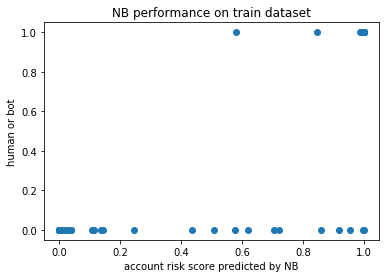

In [93]:
#visualization
plt.plot(NBS_train['p_risk'], NBS_train['outcome'], 'o')
plt.xlabel('account risk score predicted by NB')
plt.ylabel('human or bot')
plt.title('NB performance on train dataset')
plt.show()

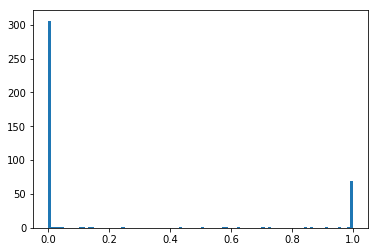

In [94]:
plt.hist(NBS_train['p_risk'], bins=100)
plt.show()

In [95]:
p_normal, p_risk = bayesPred(XNB_test, features, prior)
dfNB_test['p_normal'] = p_normal/(p_normal+p_risk)
dfNB_test['p_risk'] = p_risk/(p_normal+p_risk)
dfNB_test_bayes = dfNB_test[['bid_id','bidder_id','p_normal','p_risk']]
nb_summary_test = pd.merge(test_bids, dfNB_test_bayes, on=['bid_id','bidder_id'])
NBS_test = nb_summary_test.groupby('bidder_id')['p_risk'].quantile(.5).reset_index()
yNB_test_pred = NBS_test['p_risk']

In [96]:
NBS_test = NBS_test.fillna(0)
NBS_test.head()

,bidder_id,p_risk
0,001068c415025a009fee375a12cff4fcnht8y,0.000052
1,022ac3a7ce986049d9a4bede83ccf9ddctvg6,0.839159
2,03244a553a252dcc3a3037f0371c8d33fmpd1,0.000000
3,067ff22ebf0d33fe0deedc816d75973865jo7,0.066606
4,09d71d3e6a6871a7598dc2764c5bb4ffkz6mc,0.566549


In [97]:
np.set_printoptions(suppress=True)
yNB_test_pred = np.array(pd.merge(test_accounts, NBS_test, on='bidder_id')['p_risk'])

### Performance Evaluation
#### Read the real value

In [98]:
#read the real outcome in the table
y_test_ground = pd.read_table('data/test_account_ground.csv')

In [99]:
lines = [line.rstrip('\n') for line in open('data/test_account_ground.csv')]
y_test_ground = lines

In [100]:
y_test_ground = np.array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,\
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,\
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,\
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,\
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,\
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,\
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0])

In [101]:
y_test_ground

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0])

#### Using log loss evaluation

Logarithmic loss (related to cross-entropy) measures the performance of a classification model where the prediction input is a probability value between 0 and 1. The goal of our machine learning models is to minimize this value.

In [102]:
from sklearn.metrics import log_loss
log_loss(y_test_ground, yLR_test_pred)

0.4489400102147683

In [103]:
log_loss(y_test_ground, yNB_test_pred)

1.6907952417100875

In [ ]:
#the value of log_loss is the smaller the better, so LR is better than NB

#### Using ROC curve

In [104]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [106]:
'''
Compute Receiver operating characteristic (ROC)
It is restricted to the binary classification task.
Returns:
fpr:Increasing false positive rates such that element i is the false positive rate of predictions with
    score >= thresholds[i].
tpr:Increasing true positive rates such that element i is the true positive rate of predictions 
    with score >= thresholds[i].
thresholds:Decreasing thresholds on the decision function used to compute fpr and tpr. 
    thresholds[0] represents no instances being predicted and is arbitrarily set to max(y_score) + 1.
'''
fpr_lr, tpr_lr, _ = roc_curve(y_test_ground, yLR_test_pred)
fpr_nb, tpr_nb, _ = roc_curve(y_test_ground, yNB_test_pred)
#get the area under line
auc_lr = roc_auc_score(y_test_ground, yLR_test_pred)
auc_nb = roc_auc_score(y_test_ground, yNB_test_pred)

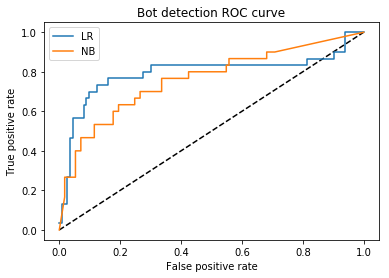

auc LR -- 0.79, auc NB -- 0.76


In [107]:
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_lr, tpr_lr, label='LR')
plt.plot(fpr_nb, tpr_nb, label='NB')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Bot detection ROC curve')
plt.legend(loc='best') #define best location of the legend, may slow when data is large
plt.show()
print ('auc LR -- {0:0.2f}'.format(auc_lr) + ', auc NB -- {0:0.2f}'.format(auc_nb))

In [ ]:
#from the ROC curve, LR is slightly better than NB

#### Using Precision-recall curve

In [108]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.utils.fixes import signature
from sklearn.metrics import average_precision_score

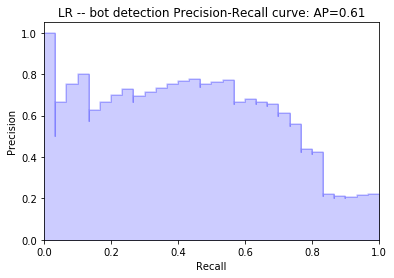

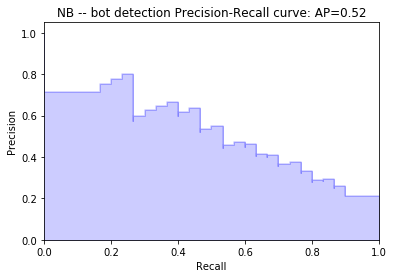

In [109]:
for method in ['LR', 'NB']:
    if method == 'LR':
        y_score = yLR_test_pred
    if method == 'NB':
        y_score = yNB_test_pred
    average_precision = average_precision_score(y_test_ground, y_score)
    precision, recall, _ = precision_recall_curve(y_test_ground, y_score)

    # In matplotlib < 1.5, plt.fill_between does not have a 'step' argument
    step_kwargs = ({'step': 'post'}
                   if 'step' in signature(plt.fill_between).parameters
                   else {})
    plt.step(recall, precision, color='b', alpha=0.2,
             where='post')
    plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title(method +' -- bot detection Precision-Recall curve: AP={0:0.2f}'.format(
              average_precision))
    plt.show()

In [ ]:
#from the PR curve, LR is also better than NB